# Predicting the future exchange rate
----   
In the previous tutorials of this module, we created a model which could predict the Dollar/Rand exchange rate for a month, given some indicator variables' values for that same month.

In this tutorial, we will try to predict *next month's* exchange rate using *this month's* economic indicators.

## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/James-Leslie/Learning-Library/master/Regression-methods/1_Linear_Regression/data/data_2.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


In [3]:
df.shape

(120, 20)

We'll be using the same data as before, except we will need to do some manipulation of the dataframe.

We're going to need to shift the 1st column by one month so that the values represent the exchange rate for the *next* month of any given row.   

This can be done pretty easily in Python using the `.shift()` method.

In [4]:
# shift all values in ZAR/USD column up one
df['ZAR/USD'] = df['ZAR/USD'].shift(-1)

# while we're at it, let's just change the column name
df.rename(columns={'ZAR/USD':'ZAR/USD (next month)'}, inplace=True)

# then we'll drop the final row
df = df[:-1]

In [5]:
df.head()

,ZAR/USD (next month),Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.66,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.97,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.79,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.62,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.92,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


## Now let's try to predict the future      
Now we can do the same things as before, but we'll use the new data.   
We'll also drop the same variables as we did in the previous tutorial.

In [6]:
from sklearn.linear_model import LinearRegression

X = df.drop(['ZAR/USD (next month)',
             'Total Reserves excl Gold (USD)',
             'Producer Price Index',
             'Central Bank Policy Rate',
             'Money Market Rate',
             'Treasury Bill Rate',
             'Deposit Rate'], axis=1)

y = df['ZAR/USD (next month)']

In [7]:
lm = LinearRegression()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20,
                                                    shuffle=False)

In [10]:
# we want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[0], index=['2015M11']))

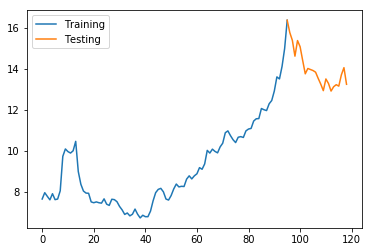

In [11]:
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()
plt.show()

In [12]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
b = float(lm.intercept_)

In [14]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [15]:
print("Intercept:", float(b))

Intercept: -1.1804035406986468


In [16]:
coeff

,Coefficient
Value of Exports (USD),-0.000135
Value of Exports (ZAR),0.000021
Value of Imports (USD),-0.000639
Value of Imports (ZAR),0.000068
IMF Reserve Position (USD),-0.003046
Foreign Exchange (USD),-0.000019
Claims on Non-residents (USD),-0.000004
Liabilities to Non-residents (USD),-0.000023
Savings Rate,-0.137118
Lending Rate,0.454384


In [17]:
from sklearn import metrics

In [18]:
train_lm = lm.predict(X_train)

print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))

MSE (train)
Linear: 0.10052110523484123


In [19]:
test_lm = lm.predict(X_test)

print('MSE (test)')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))

MSE (test)
Linear: 1.1856303064587834


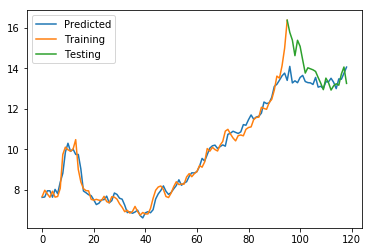

In [20]:
plt.plot(np.arange(len(y)), lm.predict(X), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()

plt.show()

----
**To summarise:**   
We learnt how to:
* use multiple linear regression to predict the future value of a response variable.   